# Homework

**Train a model to classify the sintetic data**

* Develop an algorithm that uses the given functions to train a model that classifies the sintetic data.

* You should display the graph with the loss (see below Expected result 1: Loss graph.)
* You should also display the accuracy both on the training and in the losss (see below Expected result 2: Accuracy).

**Extrapoints (optional):** Display the test data (X_test, y_test) and the line with the final boundary decision (Like appears in Class No 4, slide 19)

*Hint*:

1. Create a empty lists to store the loss during each epoch in the training process.
2. Initialize the weights and bias with the appropiate shapes

3. Loop with a stop criterion:

> * Calculate y_predict_prob
> * Calculate the gradients dw and db
> * Update the parameters of the model w and b
> * Calculate the loss and append to the list


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons # Make a sintetic dataset
from sklearn.datasets import make_classification

# Generating some sintetic data

Text(0, 0.5, 'feature 2')

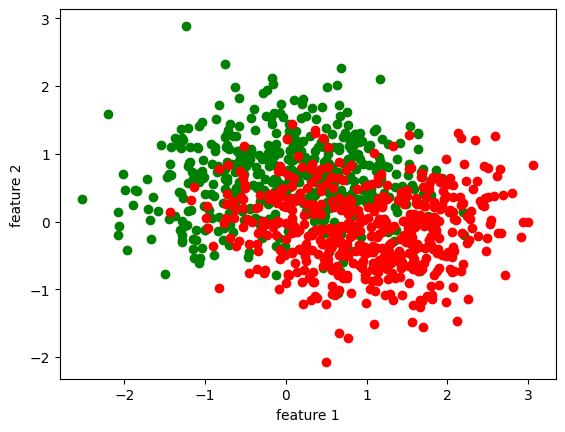

In [ ]:
# Generate some Sintetic data
n_samples = 1000
X, y = make_moons(n_samples=n_samples, noise=0.5, random_state=1)
# Plot the data
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "go")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "ro")
plt.xlabel("feature 1")
plt.ylabel("feature 2")

In [ ]:
# Printing shapes and one point and its label
print("X.shape=" ,X.shape)
print("y.shape=", y.shape)
point = np.random.randint(n_samples)
print("Data point = ", X[point,:], ", Label = ", y[point])


X.shape= (1000, 2)
y.shape= (1000,)
Data point =  [1.19123987 0.25016867] , Label =  1


In [ ]:
# Split the data.  Here the data is split in training and test data (Class 4, Slide #40)
split_size = round(n_samples*0.8)

X_train = X[:split_size]
y_train = y[:split_size]

X_test = X[split_size:]
y_test = y[split_size:]


In [ ]:
# Check the shape (dimensions) of the training and test datasets.
print("X_train.shape =",X_train.shape)
print("y_train.shape =",y_train.shape)
print("X_test.shape =",X_test.shape)
print("y_test.shape =",y_test.shape)

X_train.shape = (800, 2)
y_train.shape = (800,)
X_test.shape = (200, 2)
y_test.shape = (200,)


# Functions

In [ ]:
def loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat)) + (1-y)*np.log(1-y_hat))
    return loss

In [ ]:
def gradients(X, y, y_hat):

    # X --> Input. (1000,2)
    # y --> true/target value.
    # y_hat --> predictions.
    # w --> weights (parameter). (2,)
    # b --> bias (parameter).

    # N-> number of training examples.
    N = X.shape[0]

    # Gradient of loss w.r.t weights.
    dw = (-1/N)*np.sum(np.transpose(X)*(y-y_hat), axis=1) # (2,)

    # Gradient of loss w.r.t bias.
    db = (-1/N)*np.sum(y-y_hat)


    return dw, db

In [ ]:
def updateweights(w_current,b_current,alpha,y_hat):
  dw, db = gradients(X_train, y_train, y_hat)
  w = w_current - alpha*dw
  b = b_current - alpha*db
  return w, b

In [ ]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

In [ ]:
def predict_prob(X, w, b):

    # X --> Input with all data, X is matrix with each column contains one data. (1000,2)
    # w --> weight (2,1)
    # Output: y --> (1000,1)
    predict_prob = sigmoid(np.dot(X, w) + b)

    return np.array(predict_prob)

In [ ]:
def predict_class(X, w, b):

    # X --> Input with all data, X is matrix with each column contains one data.

    predict = sigmoid(np.dot(X, w) + b)

    TH = 0.5 # threshold
    # if y_hat >= 0.5 --> round up to 1
    # if y_hat < 0.5 --> round up to 10
    predict_class = [1 if i > TH else 0 for i in predict]

    return np.array(predict_class)

In [ ]:
def accuracy(y, y_predict_class):
    accuracy = np.sum(y == y_predict_class) / len(y)
    return accuracy



**2.Expected Results**

```
# Suggested code
plt.plot(loss)
plt.xlabel("epochs")
plt.ylabel("Loss")

```



Expected result 1: Loss graph.

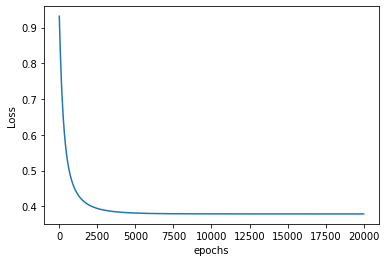

```


**Expected result 2: Accuracy**


The train accuracy = 0.78125
The test accuracy = 0.795
```

# Develop your code from here:

## Train the model

In [ ]:
# INSERT YOUR CODE HERE

losses = []

# Inicializamos los pesos
w = np.zeros(2) # (2,)
b = 0
alpha = 0.005


for epoch in range(10000):
  y_hat = predict_prob(X_train, w, b)
  losses.append(loss(y_train, y_hat))
  w, b = updateweights(w,b,alpha,y_hat)




## Plot the

Text(0, 0.5, 'Loss')

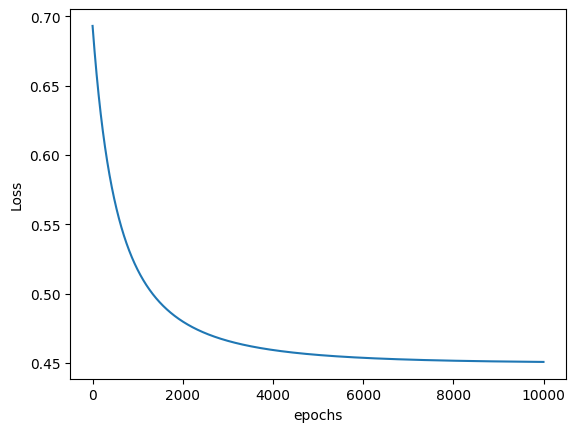

In [ ]:
plt.plot(losses)
plt.xlabel("epochs")
plt.ylabel("Loss")

## Print the accuracy

In [ ]:
accuracy_train = accuracy(y_train, predict_class(X_train, w, b))
accuracy_test = accuracy(y_test, predict_class(X_test, w, b))

print(f"The train accuracy: {accuracy_train} \nThe test accuracy: {accuracy_test}")

The train accuracy: 0.7775 
The test accuracy: 0.805


## Punto Extra

In [ ]:
x1 = np.linspace(-3,3,100)

In [ ]:
x2 = (-b-w[0]*x1)/w[1]
# Esta ecuacion sale despejando la ecuacion de regresion logistica para th = 0.5

Text(0, 0.5, 'feature 2')

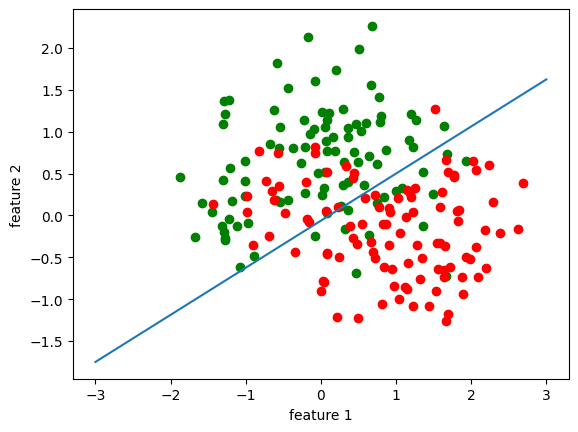

In [ ]:
plt.plot(X_test[:, 0][y_test==0], X_test[:, 1][y_test==0], "go")
plt.plot(X_test[:, 0][y_test==1], X_test[:, 1][y_test==1], "ro")
plt.plot(x1,x2)
plt.xlabel("feature 1")
plt.ylabel("feature 2")